# Installation

In [2]:
pip install chgnet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 42.2 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19172 sha256=665f07b579c0626e1d94b656277

# Define Model

In [ ]:
from chgnet.model.model import CHGNet

# Define Model

chgnet = CHGNet.load()

# Alternatively you can read your own model
# chgnet = CHGNet.from_file(model_path)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


# Structure Optimization

In [ ]:
import numpy as np
from pymatgen.core import Structure

structure = Structure.from_file('/content/drive/MyDrive/LiCoO2.cif')

print(f"original: {structure.get_space_group_info()}")

original: ('R-3m', 166)


In [ ]:
import pandas as pd
from chgnet.model import StructOptimizer

result = StructOptimizer().relax(structure)

print("Relaxed structure:\n")
print(result["final_structure"])

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
      Step     Time          Energy          fmax
FIRE:    0 09:19:17      -76.321487        0.560950
FIRE:    1 09:19:18      -76.345566        0.467104
FIRE:    2 09:19:18      -76.380447        0.342201
FIRE:    3 09:19:19      -76.400078        0.220714
FIRE:    4 09:19:19      -76.398758        0.247368
FIRE:    5 09:19:20      -76.399696        0.235225
FIRE:    6 09:19:20      -76.401421        0.211466
FIRE:    7 09:19:21      -76.403625        0.176636
FIRE:    8 09:19:21      -76.406013        0.147827
FIRE:    9 09:19:22      -76.408646        0.137030
FIRE:   10 09:19:22      -76.411415        0.139111
FIRE:   11 09:19:23      -76.413811        0.157040
FIRE:   12 09:19:23      -76.415466        0.176249
FIRE:   13 09:19:24      -76.416817        0.185620
FIRE:   14 09:19:24      -76.418442        0.181364
FIRE:   15 09:19:25      -76.420815        0.167775
FIRE:   16 09:19:26      -76.423973        0.

# Molecular Dynamics

In [ ]:
from chgnet.model.dynamics import MolecularDynamics

md = MolecularDynamics(
    atoms=structure,
    model=chgnet,
    ensemble="nvt",
    temperature=1000,  # in k
    timestep=2,  # in fs
    trajectory="md_out.traj",
    logfile="md_out.log",
    loginterval=1,
)
md.run(50)  # run a 0.1 ps MD simulation

CHGNet will run on cpu
NVT-Berendsen-MD created


In [ ]:
from ase.io.trajectory import Trajectory
from pymatgen.io.ase import AseAtomsAdaptor
from chgnet.utils import solve_charge_by_mag

traj = Trajectory("md_out.traj")
# mag = traj[-1].get_magnetic_moments()

# get the non-charge-decorated structure
structure = AseAtomsAdaptor.get_structure(traj[-1])
print(structure)

# # get the charge-decorated structure
# struct_with_chg = solve_charge_by_mag(structure)
# print(struct_with_chg)

Full Formula (Li3 Co3 O6)
Reduced Formula: LiCoO2
abc   :   2.811257   2.811257  13.909456
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (12)
  #  SP            a          b          c    final_magmom  momenta
---  ----  ---------  ---------  ---------  --------------  --------------------------------------------------------------------------
  0  Li    -2e-06     -3e-06     -0             0.00155717  [-2.3717786530282717e-06, -1.3666662100733078e-05, 2.3543040732654444e-05]
  1  Li     0.66667    0.333336   0.333332      0.00155568  [9.795784281991161e-06, 8.04124839286762e-06, -5.2540662063439074e-05]
  2  Li     0.333333   0.666667   0.666668      0.00155622  [-9.254792694868473e-07, 3.334472986725628e-06, 2.881864002000252e-05]
  3  Co     0.333334   0.666667   0.166665      0.122419    [1.5067342452274456e-05, 1.0491931783052414e-05, -0.00023984270489398252]
  4  Co    -1e-06     -0          0.5           0.122492    [-2.5888016794459998e-

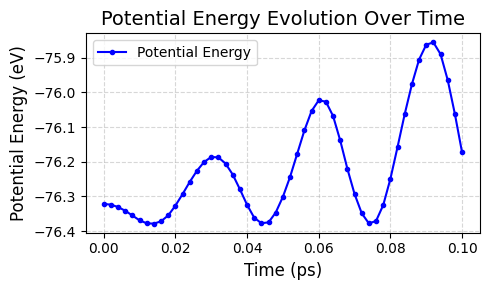

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ls_energy = []
for i in range(len(traj)):
    ls_energy.append(traj[i].get_potential_energy())

# 计算时间轴（每个点对应2fs，转换为ps）
# 1 ps = 1000 fs，所以每个点对应 2/1000 = 0.002 ps
time_ps = np.arange(len(ls_energy)) * 0.002

# 绘制折线图
plt.figure(figsize=(5, 3))
plt.plot(time_ps, ls_energy, marker='o', linestyle='-', color='b', markersize=3, label='Potential Energy')

# 设置坐标轴标签和标题
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('Potential Energy (eV)', fontsize=12)
plt.title('Potential Energy Evolution Over Time', fontsize=14)

# 添加图例和网格
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# 优化刻度显示
plt.xticks(np.arange(0, max(time_ps)+0.01, step=0.1 if max(time_ps) > 1 else 0.02))
plt.tight_layout()

plt.show()

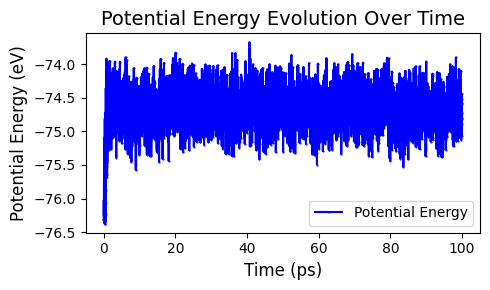

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from ase.io.trajectory import Trajectory
from pymatgen.io.ase import AseAtomsAdaptor
from chgnet.utils import solve_charge_by_mag

traj = Trajectory("/content/drive/MyDrive/LCO_100ps_md_out.traj")

ls_energy = []
for i in range(len(traj)):
    ls_energy.append(traj[i].get_potential_energy())

# 计算时间轴（每个点对应2fs，转换为ps）
# 1 ps = 1000 fs，所以每个点对应 20/1000 = 0.02 ps
time_ps = np.arange(len(ls_energy)) * 0.02

# 绘制折线图
plt.figure(figsize=(5, 3))
plt.plot(time_ps, ls_energy, marker='o', linestyle='-', color='b', markersize=0.5, label='Potential Energy')

# 设置坐标轴标签和标题
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('Potential Energy (eV)', fontsize=12)
plt.title('Potential Energy Evolution Over Time', fontsize=14)

# 添加图例和网格
plt.legend(fontsize=10)
# plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

In [9]:
# get the non-charge-decorated structure
structure = AseAtomsAdaptor.get_structure(traj[-1])

In [10]:
structure.to('final.vasp', fmt='poscar')

'Li3 Co3 O6\n1.0\n   2.8112569999999999    0.0000000000000000    0.0000000000000002\n  -1.4056284999999997    2.4346199785668299    0.0000000000000002\n   0.0000000000000000    0.0000000000000000   13.9094560000000005\nLi Co O\n3 3 6\ndirect\n   8.7945309392919082    5.1954783592579243    0.0085030907146448 Li\n  10.2522240586469735    7.0810753104418049    0.3397376816149671 Li\n   6.8593875412066936   -1.2879833473983744    0.6762819038579927 Li\n  -0.2229770814971115    9.3412814767523500    0.1823879434200424 Co\n  -0.5454935448084731    1.1088784950405524    0.4894073663159212 Co\n  -0.6809125258028876  -10.5458487078903822    0.8253627782619963 Co\n   1.4845287613414384    9.6820183004610172    0.2590102890297358 O\n   1.1246938910566930    9.9960097858324719    0.1030293726697798 O\n   1.1827525216124655    1.4888226588736320    0.5670886936572990 O\n  -1.2304770011025057    1.7042577534230476    0.4210091856491809 O\n  -0.9310813040398669  -11.2400557615037204    0.905201177975